<a href="https://colab.research.google.com/github/CakeNuthep/Quantum_Computing/blob/main/QuanTum_Computer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install pylatexenc
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 611.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4eaa98a0e8088366a3b04aafd29582133444b7013dd88618cf9dd0ea4c692a18
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.2 MB/s eta 0:00:00


#Circuit1

In [2]:
from qiskit import QuantumCircuit

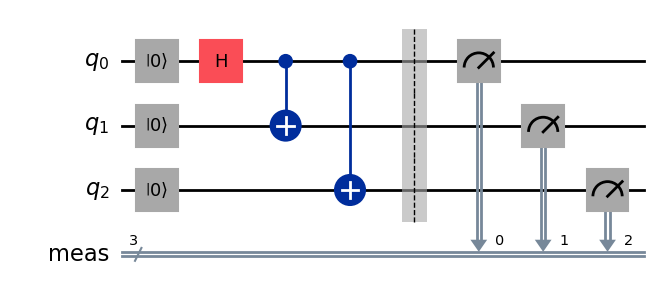

In [3]:
qc = QuantumCircuit(3)

qc.reset(0)
qc.reset(1)
qc.reset(2)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
qc.draw("mpl")

# Circuit2

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import CXGate

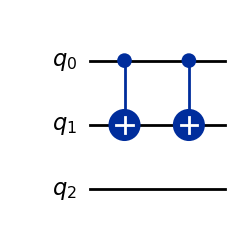

In [5]:
qc = QuantumCircuit(3)
cxg = CXGate()
qc.append(cxg, [0,1])
qc.append(cxg, [0,1])
qc.draw(output="mpl")

#Circuit3

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

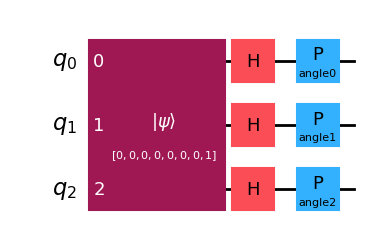

In [7]:
#make a template circuit
qc = QuantumCircuit(3)
qc.initialize([0,0,0,0,0,0,0,1])    #initial state vector
param0 = Parameter("angle0")
param1 = Parameter("angle1")
param2 = Parameter("angle2")
qc.h(0)
qc.h(1)
qc.h(2)
qc.p(param0,0)
qc.p(param1,1)
qc.p(param2,2)
qc.draw(output="mpl")

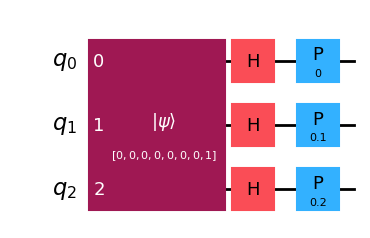

In [8]:
qcinstance = qc.assign_parameters({param0:0.0 ,param1:0.1 ,param2:0.2})
qcinstance.draw(output="mpl")

#Circuit4

In [9]:
from qiskit import QuantumCircuit

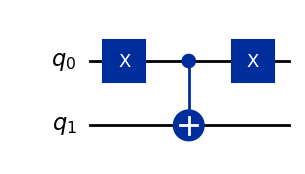

In [10]:
gatesource = QuantumCircuit(2)
gatesource.x(0)
gatesource.cx(0,1)
gatesource.x(0)
xcnotxgate = gatesource.to_gate()
gatesource.draw(output="mpl")

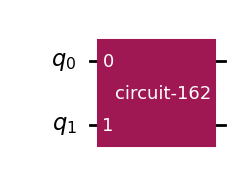

In [11]:
customgateqc = QuantumCircuit(2)
customgateqc.append(xcnotxgate, [0,1])
customgateqc.draw(output="mpl")

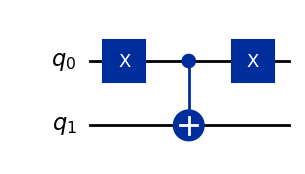

In [12]:
customgateqc.decompose().draw(output="mpl")

#Curcuit5

In [13]:
from qiskit import QuantumCircuit

In [14]:
#Make a qubit setter
instrsource = QuantumCircuit(1)
instrsource.reset(0)
instrsource.x(0)
setqubit = instrsource.to_instruction()

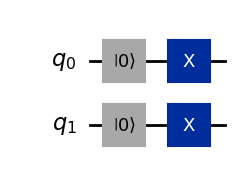

In [15]:
custominstrqc = QuantumCircuit(2)
custominstrqc.append(setqubit,[0])
custominstrqc.append(setqubit,[1])
custominstrqc.decompose().draw(output="mpl")

#simlulate_circuit

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [17]:
#Prepare simulator
simulator = Aer.get_backend("aer_simulator")
#Create a 2 qubit Quantum Circuit. With 2 classical bit
circuit = QuantumCircuit(2,2)

In [18]:
# Add a H gate on qubit 0
circuit.h(0)
#Add a CX (CNOT) gate on control qubit 0 and target quibit
circuit.cx(0,1)
#Save the current state vector to be retrived later
circuit.save_statevector(label='v1')
# Measure the qubits and save to classical bits
circuit.measure([0,1],[0,1])

In [19]:
# compile the circuit to simulator
compiled_circuit = transpile(circuit, simulator)
# Execute the circuit on the simulator. 1000 times.
job = simulator.run(compiled_circuit, shots=1000)
# Get results
result = job.result()
# Get counts from results
counts = result.get_counts(compiled_circuit)
print("\nTotals for 00 and 11 are:", counts)


Totals for 00 and 11 are: {'00': 502, '11': 498}


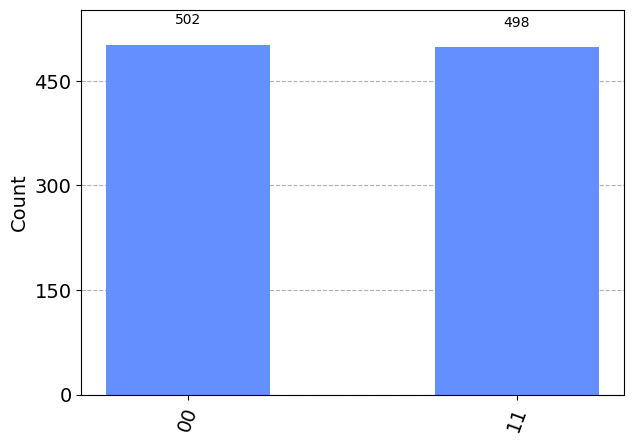

In [20]:
# histogram. will open a separate window if Spyder was setup cirrectly
plot_histogram(counts)

In [21]:
# Get staate cector thaat was saved earlier
print(result.data(0)['v1'])

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


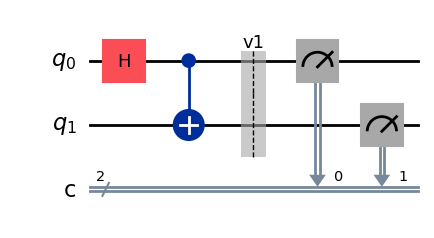

In [22]:
# Draw the circuit.
# if Spyder was set up correctly, it will desplay in seaparate window.
circuit.draw(output="mpl")

#Compute_matrix

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

In [24]:
simulator = Aer.get_backend("aer_simulator")
circuit = QuantumCircuit(2,2)
# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and acting on quibit 1
circuit.cx(0,1)

# Save thematrix of the circuit until this point
circuit.save_unitary()

compiled_circuit = transpile(circuit,simulator)

job = simulator.run(compiled_circuit)

result = job.result()

In [25]:
# Print the unitary matrix representation of circuit
print(result.get_unitary(circuit,4)) # 3 is the number of digits of precision

Operator([[ 0.7071+0.j,  0.7071-0.j,  0.    +0.j,  0.    +0.j],
          [ 0.    +0.j,  0.    +0.j,  0.7071+0.j, -0.7071+0.j],
          [ 0.    +0.j,  0.    +0.j,  0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j,  0.    +0.j,  0.    +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


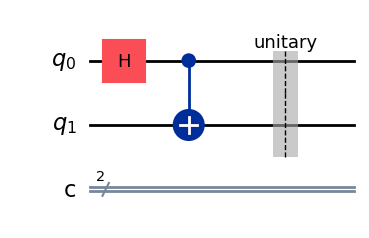

In [26]:
# Draw the circuit. will open a separate window if Spyder was set up correctly
circuit.draw(output="mpl")

#BB84 Protocal

In [27]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

In [28]:
simulator = Aer.get_backend("aer_simulator")

In [29]:
# compute a random bit to send
randomBitCircuit = QuantumCircuit(1,1)
randomBitCircuit.x(0)
randomBitCircuit.barrier()
randomBitCircuit.h(0)
randomBitCircuit.barrier()
randomBitCircuit.measure(0,0)

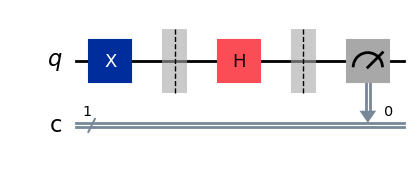

In [30]:
randomBitCircuit.draw("mpl")

In [31]:
randomBitCompiledCircuit = transpile(randomBitCircuit, simulator)
job = simulator.run(randomBitCompiledCircuit, shots=1)
result = job.result()
counts = result.get_counts(randomBitCompiledCircuit)
if("1" in counts.keys()):
  bitToSend = 1
else:
  bitToSend = 0

In [32]:
print(counts)

{'1': 1}


In [33]:
print("Bit to Send = "+str(bitToSend))

Bit to Send = 1


In [34]:
#Compute a random basis to use for sending
randomSendBasisCircuit = QuantumCircuit(1,1)
randomSendBasisCircuit.x(0)
randomSendBasisCircuit.barrier()
randomSendBasisCircuit.h(0)
randomSendBasisCircuit.barrier()
randomSendBasisCircuit.measure(0,0)

In [35]:
randomSendBasisCompiledCircuit = transpile(randomSendBasisCircuit, simulator)
job = simulator.run(randomSendBasisCompiledCircuit, shots=1)
result = job.result()
counts = result.get_counts(randomSendBasisCompiledCircuit)
if("1" in counts.keys()):
  sendBasis = 1
else:
  sendBasis = 0

In [36]:
print("Send Basis = " + str(sendBasis))

Send Basis = 1


In [37]:
#compute a random basis to use for receiveing
randomRecvBasisCircuit = QuantumCircuit(1,1)
randomRecvBasisCircuit.x(0)
randomRecvBasisCircuit.barrier()
randomRecvBasisCircuit.h(0)
randomRecvBasisCircuit.barrier()
randomRecvBasisCircuit.measure(0,0)

In [38]:
randomRecvBasisCompiledCircuit = transpile(randomRecvBasisCircuit, simulator)
job = simulator.run(randomRecvBasisCompiledCircuit, shots=1)
result = job.result()
counts = result.get_counts(randomRecvBasisCompiledCircuit)
if("1" in counts.keys()):
  recvBasis = 1
else:
  recvBasis = 0

In [39]:
print("Receive Basis = " + str(recvBasis))

Receive Basis = 0


In [40]:
#Quantum Send
commCircuit = QuantumCircuit(1,1)
if(bitToSend==1):
  commCircuit.x(0)
else:
  commCircuit.h(0) # Change the basis

In [41]:
#Quantum Receive
if(recvBasis==1):
  commCircuit.h(0) #HH = I. So this will reverse the earlier basis change
commCircuit.measure(0,0)

In [42]:
commCompiledCircuit = transpile(commCircuit, simulator)
job = simulator.run(commCompiledCircuit, shots=1)
result = job.result()
counts = result.get_counts(commCompiledCircuit)

In [43]:
if("1" in counts.keys()):
  recvBit = 1
else:
  recvBit = 0

In [44]:
#if the basis are the same, the received bit should be the ssame as the sent bit
if(sendBasis == recvBasis):
  print("Sent Bit = " + str(bitToSend)+" Received Bit = "+str(recvBit))
else:
  print("Bit was lost because basis didn't match")

Bit was lost because basis didn't match


#Shor Algorithm

#KNN Algorithm

In [46]:
import math
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

## Classical KNN algorithm

In [47]:
trainingData = [[0.9798, 0.2, 1], [0.3, 0.954, 0]]
queryData = [0.85, 0.5286]

In [48]:
# Normalize trainingData
vecLen = math.sqrt(trainingData[0][0]**2 + trainingData[0][1]**2)
trainingData[0][0] = trainingData[0][0]/vecLen
trainingData[0][1] = trainingData[0][1]/vecLen
vecLen = math.sqrt(trainingData[1][0]**2 + trainingData[1][1]**2)
trainingData[1][0] = trainingData[1][0]/vecLen
trainingData[1][1] = trainingData[1][1]/vecLen

In [49]:
# Normalize queryData
vecLen = math.sqrt(queryData[0]**2 + queryData[1]**2)
queryData[0] = queryData[0]/vecLen
queryData[1] = queryData[1]/vecLen

In [50]:
# Compute Euclidean Distances Squared
euclideanDistanceSquared = [0,0]
euclideanDistanceSquared[0] = (queryData[0]-trainingData[0][0])**2+(queryData[1]-trainingData[0][1]**2)
euclideanDistanceSquared[1] = (queryData[0]-trainingData[1][0])**2+(queryData[1]-trainingData[1][1]**2)

In [51]:
# Compute Weights
weights = [0,0]
weights[0] = 1 - 0.25*euclideanDistanceSquared[0]
weights[1] = 1 - 0.25*euclideanDistanceSquared[1]

In [52]:
# Normalize Weights
weightSum = (weights[0] + weights[1])
weights[0] = weights[0]/weightSum
weights[1] = weights[1]/weightSum

In [53]:
print("Classical Manchine Learning:")
print("P(1) = ", weights[0], " P(0) = ", weights[1] )
print("")

Classical Manchine Learning:
P(1) =  0.46135745387336924  P(0) =  0.5386425461266308



## Quantum KNN

In [54]:
simlulator = Aer.get_backend("aer_simulator")

In [56]:
circuit = QuantumCircuit(4,2)
initial_state = [0,trainingData[0][0]/2,0,trainingData[0][1]/2,trainingData[1][0]/2,0,trainingData[1][1]/2,0,0,queryData[0]/2,0,queryData[1]/2,queryData[0]/2,0,queryData[1]/2,0]
circuit.initialize(initial_state)
circuit.h(3)
circuit.save_statevector(label="v1")
circuit.measure(3,0)
circuit.save_statevector(label="v2")
circuit.measure(0,1)

In [57]:
# compile the circuit to simulator
compiled_circuit = transpile(circuit, simulator)

In [58]:
# Execute the circuit on the simulator. 10,000 times.
numerator = 0
denominator = 0
for i in range(0,10000):
  job = simulator.run(compiled_circuit, shots=1)
  # Get results
  result = job.result()
  # Get counts from results
  counts = result.get_counts(compiled_circuit)
  if("00" in counts or "10" in counts):
    stateAfterMeasuringQ3 = result.data(0)['v2']
    denominator += 1
    if("10" in counts):
      numerator += 1

Quantum Machine Learning: 
P(1) =  0.5226655071203392  P(0) =  0.4773344928796608


Intermediate State Vectors:
After Hadamard  Statevector([ 0.        +0.00000000e+00j,  0.64664282-3.67678896e-17j,
              0.        +0.00000000e+00j,  0.25741975-2.28653017e-17j,
              0.40629247-3.67678896e-17j,  0.        +0.00000000e+00j,
              0.52397973-2.28653017e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.04617762+3.67678896e-17j,
              0.        +0.00000000e+00j, -0.11599896+2.28653017e-17j,
             -0.19417274+3.67678896e-17j,  0.        +0.00000000e+00j,
              0.15056102+2.28653017e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))
After Measuring Qubit3  Statevector([ 0.        +0.00000000e+00j,  0.67269629-3.82492806e-17j,
              0.        +0.00000000e+00j,  0.26779128-2.37865526e-17j,
              0.42266213-3.82492806e-17j,  0.        +0.00000000e+00j,
              0.54509106-2.37865526

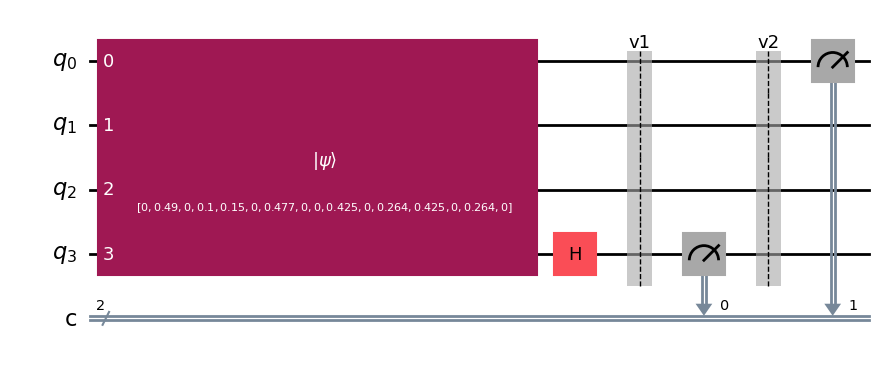

In [59]:
print("Quantum Machine Learning: ")
print("P(1) = ",numerator/denominator," P(0) = ",1-(numerator/denominator))
print("")
print("")
print("Intermediate State Vectors:")
print("After Hadamard ",result.data(0)["v1"])
print("After Measuring Qubit3 ", stateAfterMeasuringQ3)
circuit.draw(output="mpl")

#SVM Algorithm

## Quantum SVM

In [60]:
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512613 sha256=216a41c7140ca935b588ab174017910ee8faa1990b6768222422ab190c5e966c
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [81]:
from qiskit_aer import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [82]:
#IRIS Data Set
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data)
print(iris.target)
print(iris.target_names)
dimension = len(iris.data[0])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [84]:
seed = 98765 #any number
algorithm_globals.random_seed = seed
feature_map = ZZFeatureMap(feature_dimension=dimension,
                           reps=2,
                           entanglement="linear")
# backend = QuantumInstance(
#     BasicAer.get_backend("qasm_simulator"), shots=1024,
#     seed_simulator=seed, seed_transpiler=seed
# )
# kernel = QuantumKernel(feature_map=feature_map,
#                        quantum_instance=backend)
fidelity = ComputeUncompute(sampler=Sampler())
kernel = FidelityQuantumKernel(feature_map=feature_map,
                       fidelity=fidelity)
qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(iris.data,iris.target)
qsvc.score(iris.data, iris.target)

0.9733333333333334

In [85]:
print(qsvc.predict([[5.0, 3.3, 1.5, 0.3],
                    [6.0, 2.9, 5.2, 1.7]]))

[0 2]
